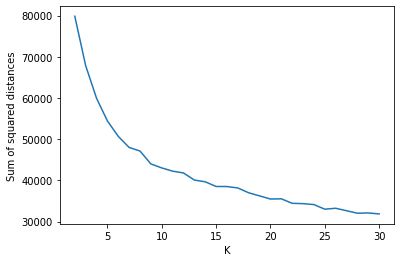

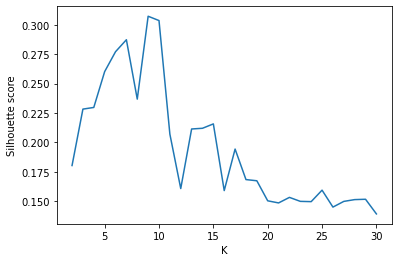

In [5]:
#Oppgave A
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
%matplotlib inline



data = pd.read_csv("agaricus-lepiota.csv")
x = pd.get_dummies(data)

sum_of_squared_distances = []
sc = []
k = range(2, 31)
for n_clusters in k:
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(x)
    sum_of_squared_distances.append(kmeans.inertia_)
    sc.append(metrics.silhouette_score(x.values, kmeans.labels_, metric='euclidean'))
    
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.plot(k, sum_of_squared_distances)
plt.figure(2)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.plot(k, sc)


In [6]:
#Ser her ut som 8 clusters er optimalt for datasettet

In [7]:
#B
kmeans = KMeans(n_clusters = 8)
y_predicted = kmeans.fit_predict(x)
data['cluster'] = y_predicted
data.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cluster
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,6
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,5
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,5
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,6
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,3


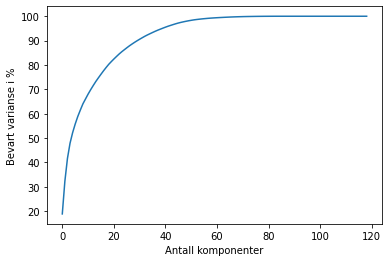

In [8]:
pca = PCA()
pca.fit(x)

plt.plot(range(0,119), pca.explained_variance_ratio_.cumsum()*100)
plt.xlabel('Antall komponenter')
plt.ylabel('Bevart varianse i %')
plt.show()

In [9]:
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)
print(x_new)

[[-0.6382678  -0.70374211]
 [-1.57328657  0.02737478]
 [-1.67059339 -0.19809025]
 ...
 [-0.63011428 -0.33713921]
 [ 1.86929201 -1.80312639]
 [-0.58914958 -0.32840325]]


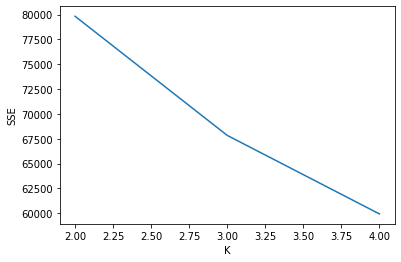

In [10]:
sse = []
k_range = range(2,5)
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

In [11]:
kmeans = KMeans(n_clusters = 3)
y_predicted = kmeans.fit_predict(x_new)
y_predicted

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
for i in range(0, len(x_new)):
    if(y_predicted[i] == 0):
        plt.scatter(x_new[i][0], x_new[i][1], color = 'blue')
    elif(y_predicted[i] == 1):
        plt.scatter(x_new[i][0], x_new[i][1], color = 'red')
    elif(y_predicted[i] == 2):
        plt.scatter(x_new[i][0], x_new[i][1], color = 'green')